In [33]:
import re
from nltk.corpus import stopwords
    
def PreProcessTweets(df):
    tweets_df.drop_duplicates(subset = ["id"], keep = "first", inplace = True)
    tweets_df["text"] = tweets_df["full_text"]
    tweets_df["text"] = tweets_df["text"].str.lower()
    
    tweets_df["text"] = [re.sub(r"(?:\@|https?\://)\S+", "", text) for text in tweets_df["text"]]
    
    intab = "áéíóúïü"
    outtab = "aeiouiu"
    trantab = str.maketrans(intab, outtab)

    tweets_df["text"] = [text.translate(trantab) for text in tweets_df["text"]]
    tweets_df["text"] = tweets_df["text"].str.replace("[^a-zñ\s]", "")
    
    stop = stopwords.words("spanish")
    tweets_df["text"] = tweets_df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    stop = df["key_words"].iloc[0].lower().translate(trantab).split(" ")
    tweets_df["text"] = tweets_df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [34]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
    
def DrawWordCloud(df):
    text = df["text"].values.tolist()
    words = str(text)
    words = re.sub("[^a-z]+", " ", words)

    wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(words)

    plt.figure()
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

In [35]:
def CreateWordCloud(sheet_name, df):
    print(sheet_name)
    PreProcessTweets(df)
    DrawWordCloud(df)

Edmundo Del Águila


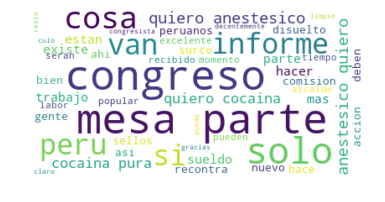

Víctor García


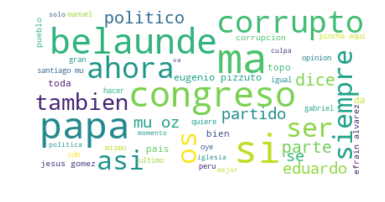

In [36]:
import pandas as pd

sheets = pd.read_excel("tweets.xlsx", sheet_name = None)

for name, sheet in sheets.items():
    tweets_df = pd.DataFrame(sheet,
                             columns = [
                                 "id",
                                 "full_text",
                                 "query",
                                 "congressman_name",
                                 "key_words"
                             ])
    tweets_df = CreateWordCloud(name, tweets_df)